# Exoplanet Spectra
In this simulator you will be recovering spectra from exoplanet systems to understand what their atmospheres are made of.

Start importing the necessary modules

In [36]:
import exo_engine
reload(exo_engine)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
from astropy.io import fits, ascii
from astropy.table import Table
import batman

Look at some example molecules in an atmosphere

Start with an exoplanet transit

In [37]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 48.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.3, 0.0]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

Initialize the model

In [38]:
t = np.linspace(-1, 1, 100)
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

Text(0,0.5,'Relative brightness')

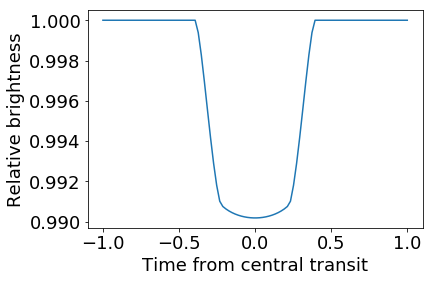

In [39]:
plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative brightness")

Compare this to an animation from J Eastman (Penn State University)

![SegmentLocal](HAT-P-3b-xpb0j3_eastman_psu.gif "segment")

### Exercise 1
Experiment what happens at different radii and limb darkening. Does increasing the radius make the dip deeper or shallower? Below is an example with 2 different limb darkening parameters.

Text(0,0.5,'Relative brightness')

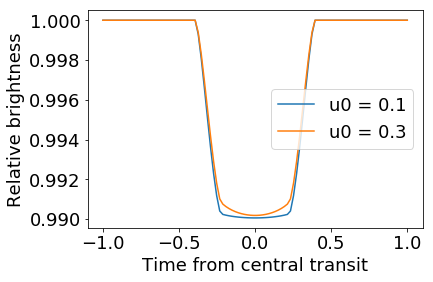

In [40]:
params.u[0] = 0.1
m = batman.TransitModel(params, t); flux = m.light_curve(params) 
plt.plot(t, flux,label='u0 = 0.1')

params.u[0] = 0.3
m = batman.TransitModel(params, t); flux = m.light_curve(params) 
plt.plot(t, flux,label='u0 = 0.3')
plt.legend()
plt.xlabel("Time from central transit")
plt.ylabel("Relative brightness")

And now look at the time lightcurves for different colors

Text(0,0.5,'Relative brightness')

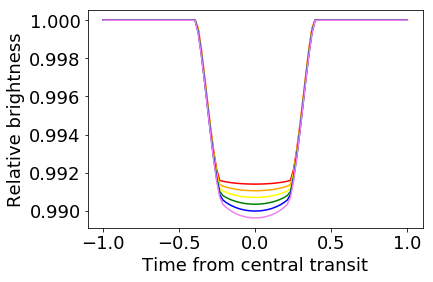

In [41]:
wavelengths =  [  5.0   ,  4.0   ,   3.0   , 2.0     , 1.0     , 0.5]
radius_array = [  0.093 , 0.095  ,  0.097  ,0.099    ,0.101    ,0.103]
colors_array = [  'red' ,'orange','yellow' ,'green',  'blue',  'violet']
limb_dark_arr = [   0.1 , 0.15   ,   0.2,   0.25     , 0.3     , 0.35]
for one_radius,one_color,u0 in zip(radius_array,colors_array,limb_dark_arr):
    params.rp = one_radius                      #planet radius (in units of stellar radii)
    params.u[0] = u0
    m = batman.TransitModel(params, t)    #initializes model
    flux = m.light_curve(params)          #calculates light curve
    plt.plot(t, flux,color=one_color)
plt.xlabel("Time from central transit")
plt.ylabel("Relative brightness")

Show the spectrum of the planet. What color will it's sillhoutte have?

Text(0,0.5,'Size (Jupiter Radii)')

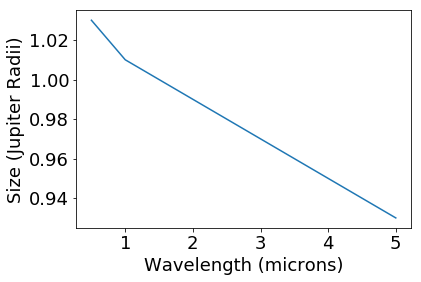

In [42]:
plt.plot(wavelengths,np.array(radius_array) * 10.)
plt.xlabel('Wavelength (microns)')
plt.ylabel('Size (Jupiter Radii)')

Visualize the surfaces of the planet at each color

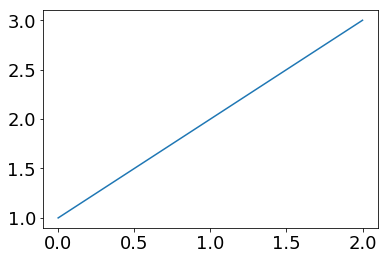

In [48]:
plt.plot([1,2,3])

Text(0,0.5,'Y Size in Jupiters')

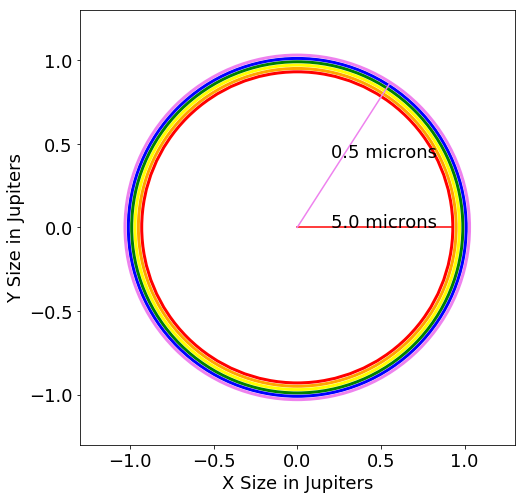

In [83]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.set_xlim(-1.3,1.3)
ax.set_ylim(-1.3,1.3)
for one_radius,one_color in zip(radius_array,colors_array):
    circlePatch = plt.Circle((0., 0.), one_radius * 10.,linewidth=3,
                             edgecolor=one_color,facecolor='none')
    ax.add_artist(circlePatch)

for ind,angle in zip([0,-1],[0,1,0.7]):
    ax.plot([0,radius_array[ind] * np.cos(angle) * 10.],
            [0,radius_array[ind] * np.sin(angle) * 10.],color=colors_array[ind])
    ax.text(0.2,np.sin(angle)* 0.5,"{} microns".format(wavelengths[ind]))
ax.set_xlabel('X Size in Jupiters')
ax.set_ylabel('Y Size in Jupiters')

Now, what color do you think the sillhoutte will have?

## Now put in the star

Text(0,0.5,'Y Size in Jupiters')

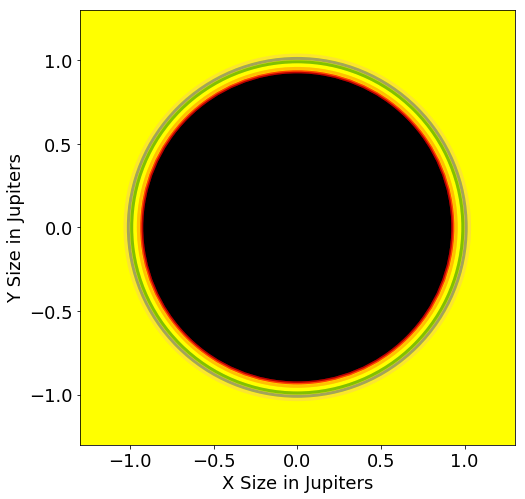

In [97]:
## Now put in a background star
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.set_xlim(-1.3,1.3)
ax.set_ylim(-1.3,1.3)

circlePatch = plt.Circle((0., 0.), 10.,
                         edgecolor=one_color,facecolor='yellow')
ax.add_artist(circlePatch)
circlePatch = plt.Circle((0., 0.), np.min(radius_array) * 10.,
                         edgecolor='none',facecolor='black')
ax.add_artist(circlePatch)

sortInd = np.argsort(radius_array)
for ind in sortInd:
    thisRadius = radius_array[ind]
    for max_radius,one_color in zip(radius_array,colors_array):

        if thisRadius >= max_radius:
            circlePatch = plt.Circle((0., 0.), max_radius * 10.,linewidth=3,
                         edgecolor=one_color,facecolor='none',alpha=0.2)
            ax.add_artist(circlePatch)

ax.set_xlabel('X Size in Jupiters')
ax.set_ylabel('Y Size in Jupiters')


## An exoplanet Atmosphere with Molecules
Now interpret the lightcurves 

Text(0,0.5,'Transit Depth (%)')

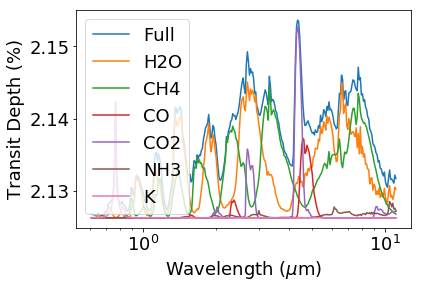

In [92]:
dat = Table.read('opacity_breakdown_gto_f_hd189733b.fits')
for oneColumn in dat.colnames:
    if oneColumn != 'Wave':
        plt.semilogx(dat['Wave'],dat[oneColumn] * 100.,label=oneColumn)
plt.legend()
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Transit Depth (%)')

In [10]:
dat.colnames

['Wave', 'Full', 'H2O', 'CH4', 'CO', 'CO2', 'NH3', 'K']

Look what happens when there are clouds: